In [1]:
import csv
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

In [2]:
data=pd.read_csv("Medical Appointment No Shows V4")

In [3]:
data

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppointmentDay,ScheduledDay,Wait_Days
0,2.987250e+13,5642903,0,62,39.0,0,1,0,0,0,0,0,5,5,0
1,5.589978e+14,5642503,1,56,39.0,0,0,0,0,0,0,0,5,5,0
2,4.262962e+12,5642549,0,62,45.0,0,0,0,0,0,0,0,5,5,0
3,8.679512e+11,5642828,0,8,54.0,0,0,0,0,0,0,0,5,5,0
4,8.841186e+12,5642494,0,56,39.0,0,1,1,0,0,0,0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,2.572134e+12,5651768,0,56,43.0,0,0,0,0,0,1,0,2,2,35
110517,3.596266e+12,5650093,0,51,43.0,0,0,0,0,0,1,0,2,2,35
110518,1.557663e+13,5630692,0,21,43.0,0,0,0,0,0,1,0,2,3,41
110519,9.213493e+13,5630323,0,38,43.0,0,0,0,0,0,1,0,2,3,41


In [ ]:
#profile = ProfileReport(data)

In [ ]:
#profile

In [19]:
110521/(2*88208) # class 0

0.626479457645565

In [21]:
110521/(2*22319) #class 1

2.4759397822483087

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data[["Wait_Days", "SMS_received", "Handcap","Alcoholism","Diabetes","Hipertension","Scholarship", "Neighbourhood","Age","Gender", ]], data["No_show"],test_size=0.2)


# DecisionTreeClassifier

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=0, ccp_alpha= 0.002, criterion= 'gini', max_depth= 7)  
dt.fit(X_train, y_train)   #fitting our model
y_pred=dt.predict(X_test)

In [ ]:
y_pred_1=dt.predict(X_train)

### accuracy with label train and also label test

In [ ]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

In [ ]:
print("score:{}".format(accuracy_score(y_train, y_pred_1)))

In [ ]:
#tree_para = {'ccp_alpha':[0.0, 0.002, 0.004, 0.006], 'max_depth':[7,8,10,12],'criterion':['gini', 'entropy']}
#clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), tree_para)
#clf.fit(X_train, y_train)

In [ ]:
#clf.best_params_

In [ ]:
cm = ConfusionMatrix(dt, classes=dt.classes_)
cm.score(X_test, y_test)
cm.show();

In [ ]:
visualizer = ClassificationReport(dt, classes=dt.classes_, support=True)

visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   ;

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
viz = PrecisionRecallCurve(DecisionTreeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.7758878081881927


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


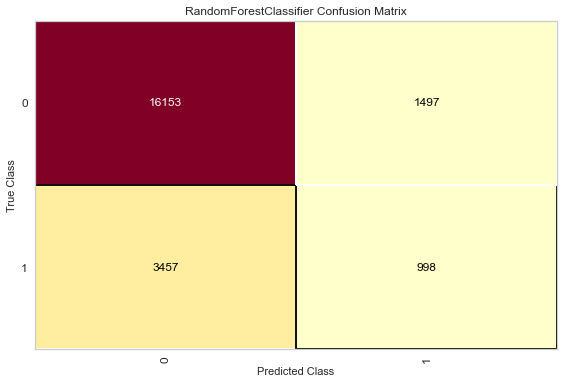

In [7]:
cm = ConfusionMatrix(model, classes=model.classes_)
cm.score(X_test, y_test)
cm.show();

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


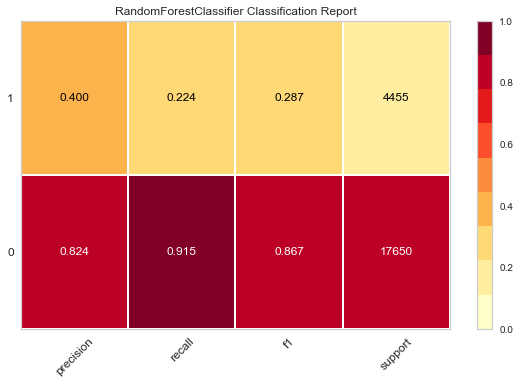

In [8]:
visualizer = ClassificationReport(model, classes=model.classes_, support=True)

visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   ;

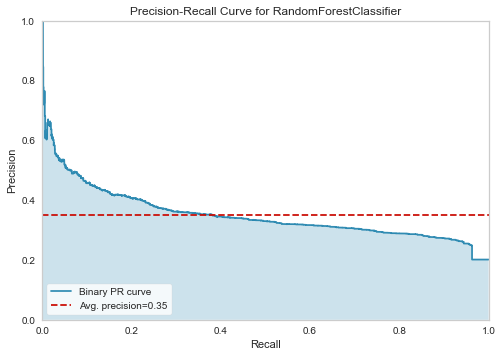

In [27]:
viz = PrecisionRecallCurve(RandomForestClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# Xgboost

In [13]:
import xgboost as xgb
from xgboost import XGBClassifier

In [14]:
model1 = XGBClassifier()
model1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


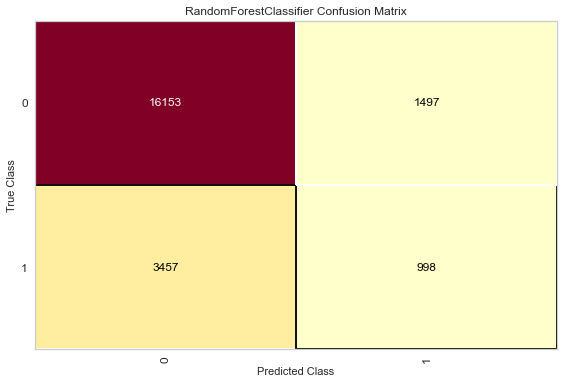

In [15]:
cm = ConfusionMatrix(model, classes=model1.classes_)
cm.score(X_test, y_test)
cm.show();

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


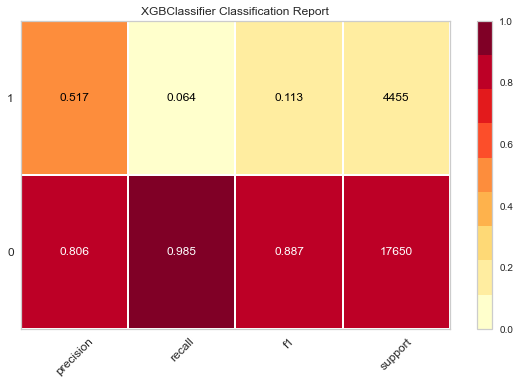

In [16]:
visualizer = ClassificationReport(model1, classes=model1.classes_, support=True)

visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   ;

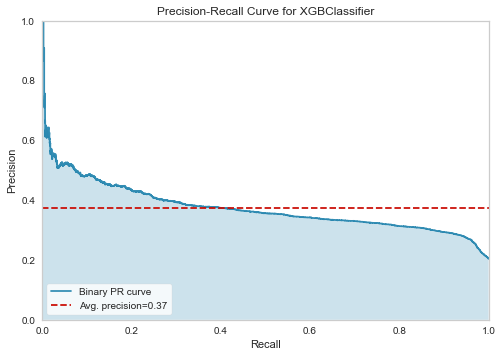

In [17]:
viz = PrecisionRecallCurve(XGBClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();